In [1]:
import numpy as np

class AdalineDG:
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, Y):
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size = 1 + X.shape[1])
        
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = Y - output
            self.w_[1:] += self.eta * np.dot(X.T, errors)
            self.w_[0] += self.eta * errors.sum()
            
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
            
            
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
    
    

In [2]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

Y = df.iloc[:100, 4].values
Y = np.where(Y == 'Iris-setosa', -1, 1)

X= df.iloc[:100, [0,2]].values

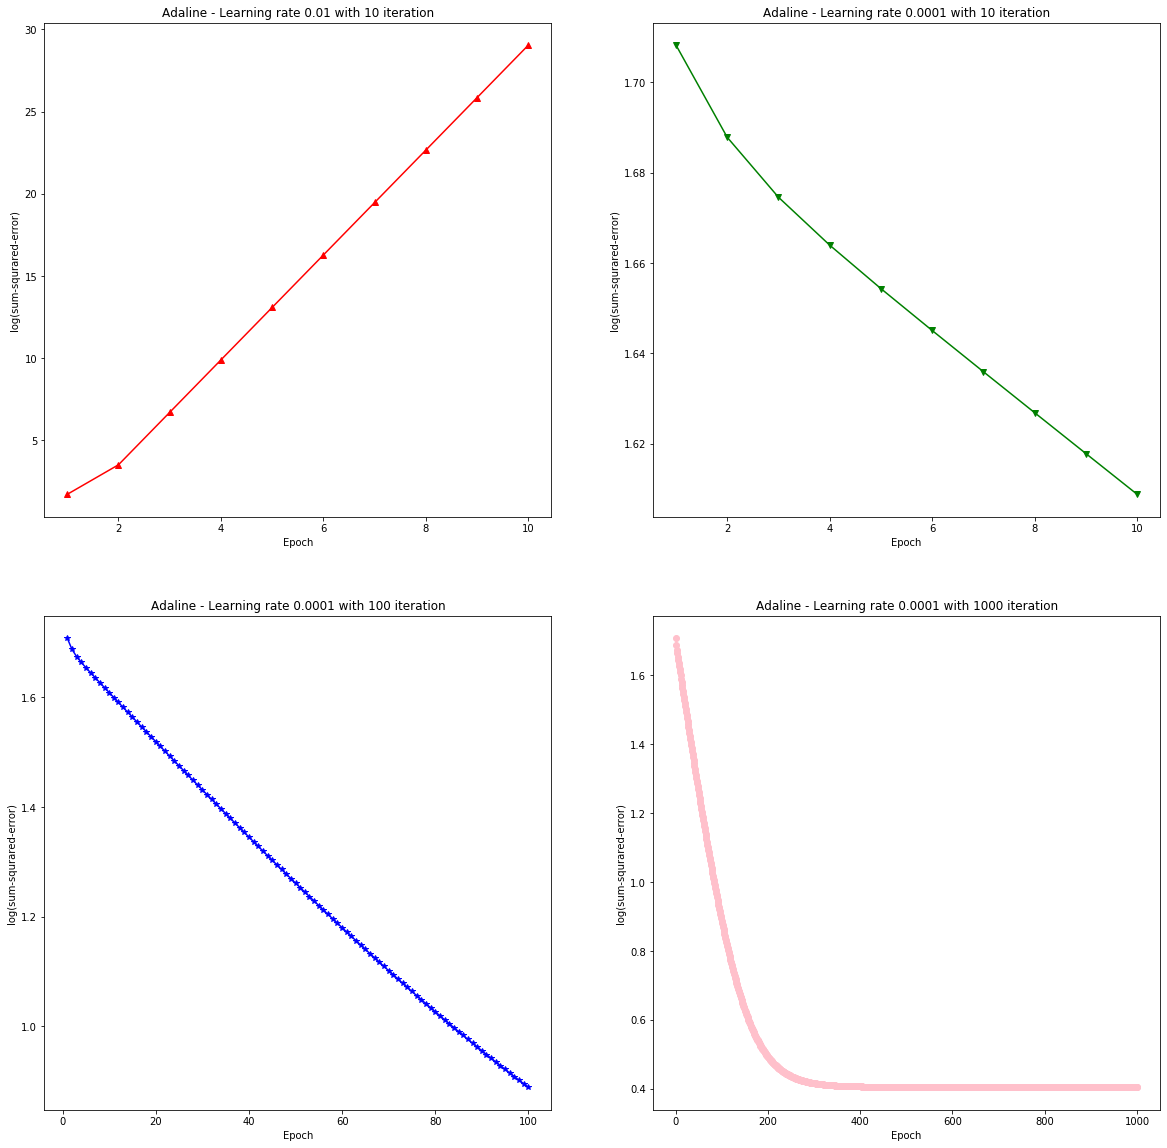

In [13]:
import matplotlib.pyplot as plt

fix, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

ada1 = AdalineDG(n_iter=10, eta=0.01).fit(X, Y)
ax[0][0].plot(range(1, len(ada1.cost_)+1), np.log10(ada1.cost_), color = 'red', marker='^')
ax[0][0].set_xlabel('Epoch')
ax[0][0].set_ylabel('log(sum-squrared-error)')
ax[0][0].set_title('Adaline - Learning rate 0.01 with 10 iteration')

ada2 = AdalineDG(n_iter=10, eta=0.0001).fit(X, Y)
ax[0][1].plot(range(1, len(ada2.cost_)+1), np.log10(ada2.cost_), color = 'green', marker='v')
ax[0][1].set_xlabel('Epoch')
ax[0][1].set_ylabel('log(sum-squrared-error)')
ax[0][1].set_title('Adaline - Learning rate 0.0001 with 10 iteration')


ada3 = AdalineDG(n_iter=100, eta=0.0001).fit(X, Y)
ax[1][0].plot(range(1, len(ada3.cost_)+1), np.log10(ada3.cost_), color = 'blue', marker='*')
ax[1][0].set_xlabel('Epoch')
ax[1][0].set_ylabel('log(sum-squrared-error)')
ax[1][0].set_title('Adaline - Learning rate 0.0001 with 100 iteration')

ada4 = AdalineDG(n_iter=1000, eta=0.0001).fit(X, Y)
ax[1][1].plot(range(1, len(ada4.cost_)+1), np.log10(ada4.cost_), color = 'pink', marker='o')
ax[1][1].set_xlabel('Epoch')
ax[1][1].set_ylabel('log(sum-squrared-error)')
ax[1][1].set_title('Adaline - Learning rate 0.0001 with 1000 iteration')

plt.show()